In [1]:
import pandas as pd

In [10]:
df=pd.read_csv("train.csv")

In [13]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [52]:
df.describe(include="all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,valid_call,log_balance
count,42130.000000,41867,42130,40419,42130,42130.000000,42130,42130,29851,42130.000000,42130,42130.000000,42130.000000,42130.000000,42130.000000,7586,42130,42130,3.841400e+04
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3,2,1,NaN
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,failure,no,True,NaN
freq,NaN,9245,25242,21929,41318,NaN,23687,35131,27199,NaN,13096,NaN,NaN,NaN,NaN,4506,37311,42130,NaN
mean,40.737076,NaN,NaN,NaN,NaN,771.205578,NaN,NaN,NaN,15.785901,NaN,256.905151,2.771066,40.156777,0.571327,NaN,NaN,NaN,-inf
std,10.523399,NaN,NaN,NaN,NaN,1063.335297,NaN,NaN,NaN,8.353643,NaN,255.755541,3.105184,100.631511,2.310614,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000,-1.000000,0.000000,NaN,NaN,NaN,-inf
25%,32.000000,NaN,NaN,NaN,NaN,54.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN,NaN,4.828314e+00
50%,39.000000,NaN,NaN,NaN,NaN,381.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN,NaN,6.146329e+00
75%,48.000000,NaN,NaN,NaN,NaN,1118.000000,NaN,NaN,NaN,21.000000,NaN,317.000000,3.000000,-1.000000,0.000000,NaN,NaN,NaN,7.120444e+00


In [16]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [37]:
df['education'].value_counts()
# Keep "unknown" for group analysis later


education
secondary    21929
tertiary     12054
primary       6436
Name: count, dtype: int64

In [48]:
#assign new column
df = df.copy()
df['valid_call'] = df['duration'] > 0

# Check subscription rate by call validity
df.groupby('valid_call')['y'].value_counts(normalize=True)


valid_call  y  
True        no     0.885616
            yes    0.114384
Name: proportion, dtype: float64

In [51]:
(df['duration'] == 0).sum()


df = df[df['duration'] > 0]



In [26]:
(df['duration'] == 0).sum()

np.int64(0)

In [53]:
# Check quantiles for balance
df['balance'].describe()

#extreme outliers beyond 99th percentile
upper_limit = df['balance'].quantile(0.99)
df = df[df['balance'] < upper_limit]


In [54]:
df['y'].value_counts(normalize=True)


y
no     0.886422
yes    0.113578
Name: proportion, dtype: float64

In [55]:
# Subscription rate by job
df.groupby('job')['y'].value_counts(normalize=True).unstack()


y,no,yes
job,,
admin.,0.881089,0.118911
blue-collar,0.928400,0.071600
entrepreneur,0.918800,0.081200
housemaid,0.913043,0.086957
management,0.867125,0.132875
retired,0.780658,0.219342
self-employed,0.885996,0.114004
services,0.910112,0.089888
student,0.712963,0.287037


In [56]:
# Conversion rate by job
job_conversion = df[df['y'] == 'yes'].groupby('job').size() / df.groupby('job').size()
job_conversion.sort_values(ascending=False)


job
student          0.287037
retired          0.219342
unemployed       0.160067
management       0.132875
admin.           0.118911
self-employed    0.114004
technician       0.105944
services         0.089888
housemaid        0.086957
entrepreneur     0.081200
blue-collar      0.071600
dtype: float64

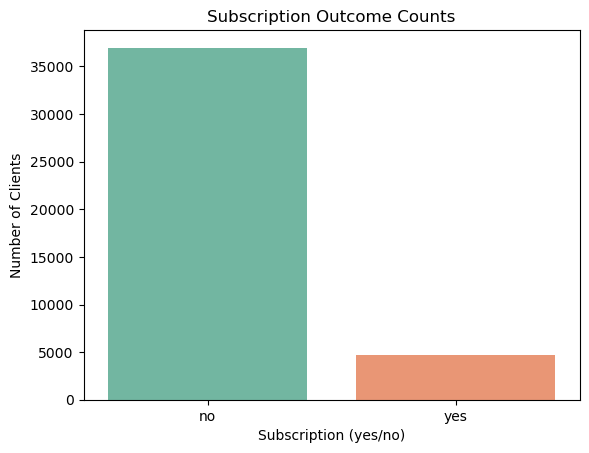

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Updated code for Seaborn >=0.13
sns.countplot(data=df, x='y', hue='y', palette='Set2', legend=False)
plt.title('Subscription Outcome Counts')
plt.xlabel('Subscription (yes/no)')
plt.ylabel('Number of Clients')
plt.show()



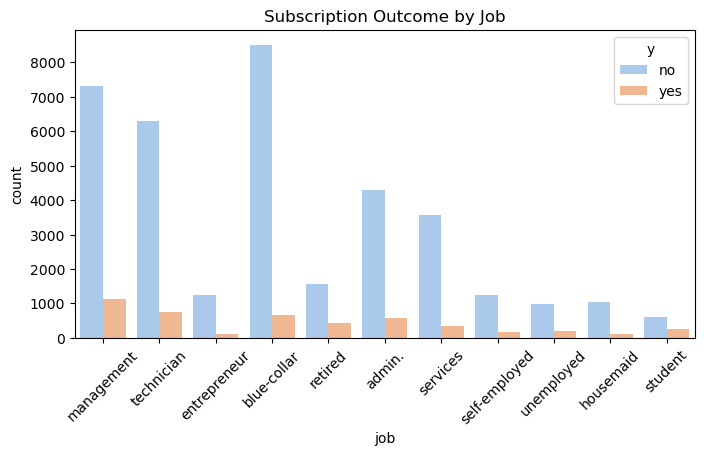

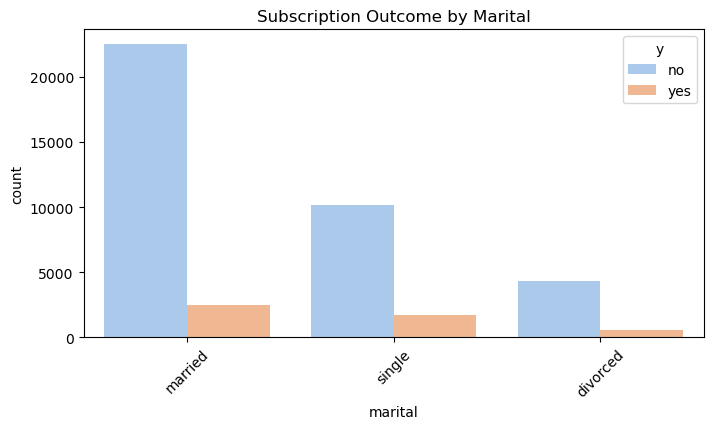

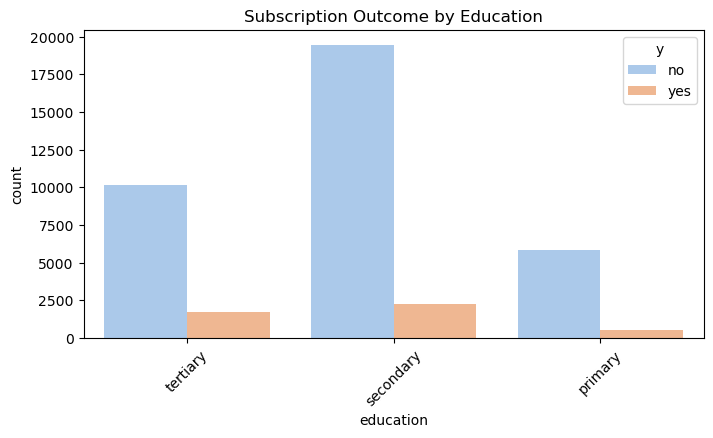

In [61]:
columns = ['job', 'marital', 'education']
for col in columns:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue='y', palette='pastel')
    plt.title(f'Subscription Outcome by {col.capitalize()}')
    plt.xticks(rotation=45)
    plt.show()


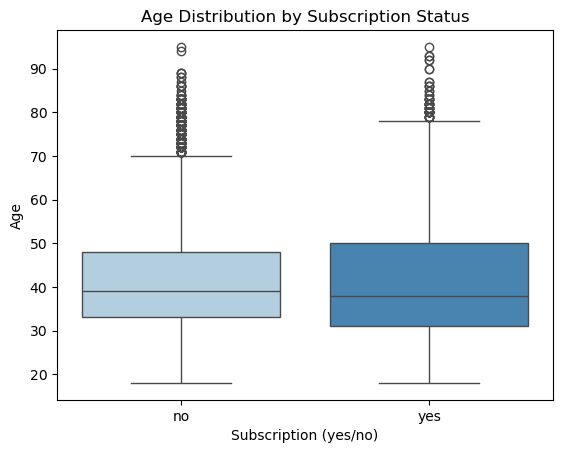

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Updated for Seaborn >=0.13
sns.boxplot(x='y', y='age', hue='y', data=df, palette='Blues', legend=False)
plt.title('Age Distribution by Subscription Status')
plt.xlabel('Subscription (yes/no)')
plt.ylabel('Age')
plt.show()



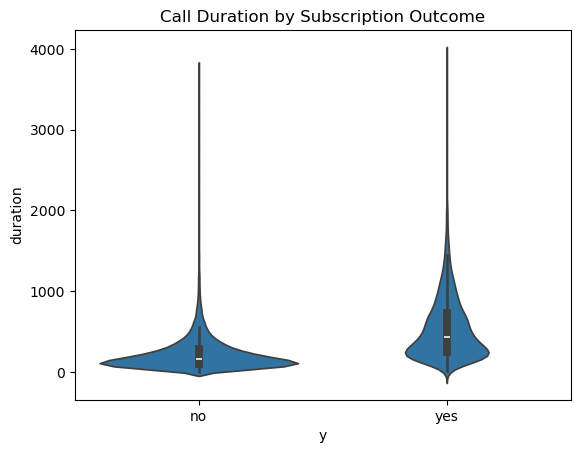

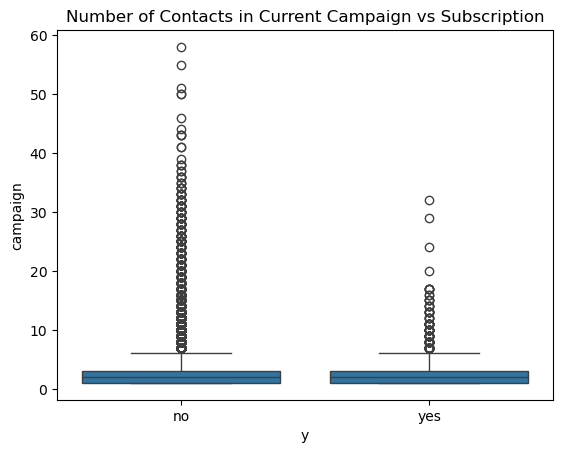

In [64]:
# Duration analysis
sns.violinplot(x='y', y='duration', data=df)
plt.title('Call Duration by Subscription Outcome')
plt.show()

# Number of contacts analysis
sns.boxplot(x='y', y='campaign', data=df)
plt.title('Number of Contacts in Current Campaign vs Subscription')
plt.show()


In [71]:
print(df.columns)



Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'valid_call', 'log_balance'],
      dtype='object')


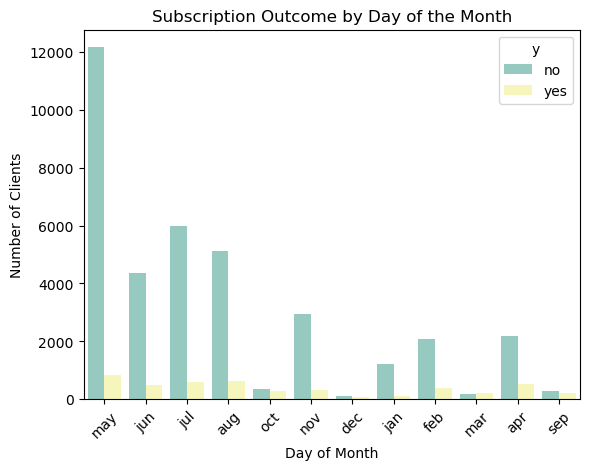

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='month', hue='y', data=df, palette='Set3')
plt.title('Subscription Outcome by Day of the Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45)
plt.show()





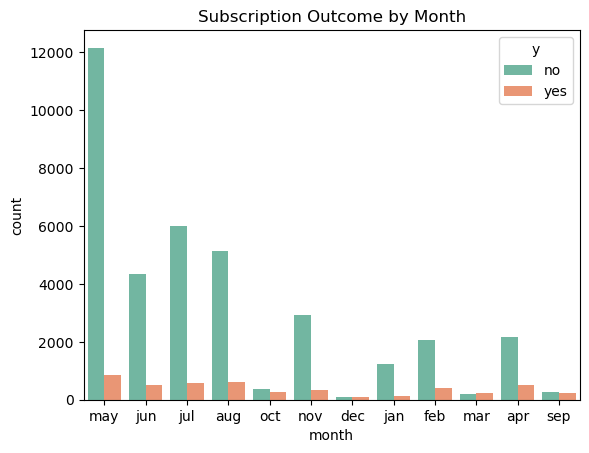

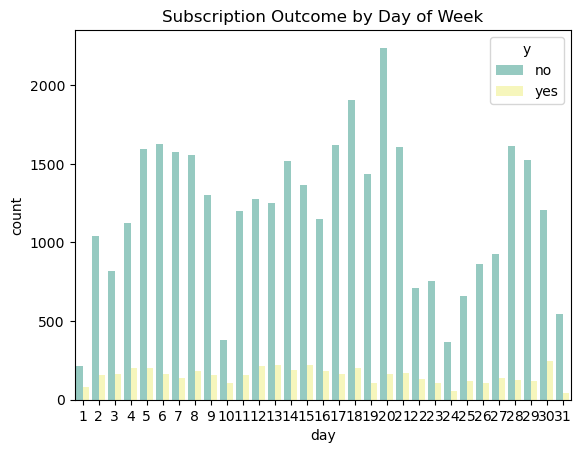

In [76]:
sns.countplot(x='month', hue='y', data=df, palette='Set2')
plt.title('Subscription Outcome by Month')
plt.show()

sns.countplot(x='day', hue='y', data=df, palette='Set3')
plt.title('Subscription Outcome by Day of Week')
plt.show()


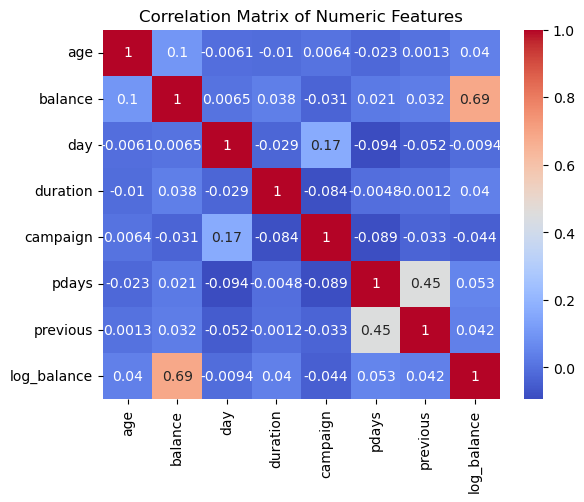

In [77]:
import numpy as np
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


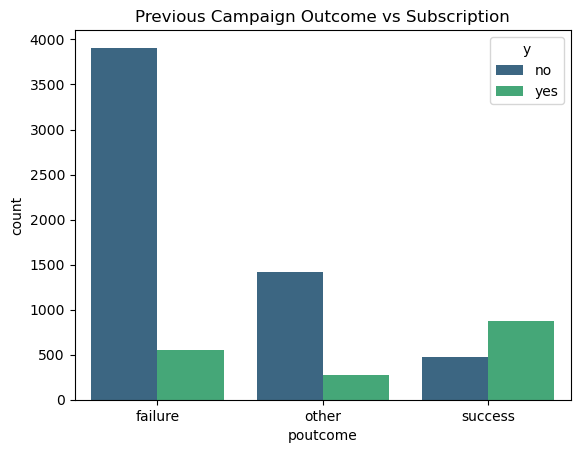

In [78]:
sns.countplot(x='poutcome', hue='y', data=df, palette='viridis')
plt.title('Previous Campaign Outcome vs Subscription')
plt.show()
